In [1]:
# once i have wholegenome_offset.trees
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
from matplotlib import colors as mcolors
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

poly_str_order = ['1',    '2',    '5',   '10',   '20',   '50',  '100',  '500', '1000']
optima_order = ['optima0', 'optima1', 'optima1.5', 'optima2', 'optima3', 'optima4', 'optima5', 'optima6']

/tmp/ipykernel_228658/258246498.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
!pwd

/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/final_results_es_dep_af


In [3]:
heritability_data= {'1': 0.1,
'2': 0.3,
'3': 0.5,
'4': 0.7,
'5': 0.9}

optima_dict = {'optima7': 7,
               'optima6': 6,
               'optima5': 5,
               'optima4': 4,
               'optima3': 3,
               'optima2': 2,
               'optima1.5': 1.5,
               'optima1': 1,
               'optima0': 0}

def get_params(df):
    df = df.reset_index()
    df['index'] = df['index'].str.split('/subp').str[0]
    df['optima'] = df['index'].str.split('/').str[-1]
    df['sel'] = df['index'].str.split('/').str[-2]
    df['h2'] = df['index'].str.split('/').str[-3]
    df['poly'] = df['index'].str.split('_').str[-2]
    df['rep'] = df['index'].str.split('_').str[-1].str.split('/').str[0]
    df = df.drop('index',axis=1)
    return df

In [4]:
palette = sns.color_palette("viridis", 3)
h1_levels = [0.1, 0.5, 0.9]

In [5]:
!pwd

/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/final_results_es_dep_af


In [6]:
path = '/global/scratch/users/tbellg/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [7]:
path = '/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [8]:
pop_size = pd.read_csv(path + 'pop_size_early.csv', index_col=[0])
pop_size = get_params(pop_size)

In [9]:
vfitnes = pd.read_csv(path + 'vfitnes.csv', index_col=[0])
vfitnes = get_params(vfitnes)

In [10]:
vfitnes['vfitnes_gen0'] = vfitnes['0']

In [11]:
vfitnes = vfitnes[['optima', 'sel', 'h2', 'poly', 'rep', 'vfitnes_gen0']]

In [12]:
pop_size['survival']=  pop_size['9'].fillna(0)

In [13]:
pop_size = pop_size[['optima', 'sel', 'h2', 'poly', 'rep', 'survival']]

In [14]:
pop_size

,optima,sel,h2,poly,rep,survival
0,optima2,estrongsel,5,pi2,11,0.0
1,optima2,estrongsel,5,pi2,11,0.0
2,optima2,estrongsel,5,pi2,11,0.0
3,optima2,estrongsel,5,pi2,11,0.0
4,optima2,estrongsel,5,pi2,11,0.0
...,...,...,...,...,...,...
48595,optima0,estrongsel,3,pi500,23,65.0
48596,optima0,estrongsel,3,pi500,23,43.0
48597,optima0,estrongsel,3,pi500,23,16.0
48598,optima0,estrongsel,3,pi500,23,40.0


In [15]:
pop_size['poly'] = pop_size['poly'].str.replace('pi', '').astype(int)
pop_size['h2'] = pop_size['h2'].replace(heritability_data)
pop_size['optima_int'] = pop_size['optima'].replace(optima_dict)

vfitnes['poly'] = vfitnes['poly'].str.replace('pi', '').astype(int)
vfitnes['h2'] = vfitnes['h2'].replace(heritability_data)
vfitnes['optima_int'] = vfitnes['optima'].replace(optima_dict)

/tmp/ipykernel_228658/1273667670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pop_size['h2'] = pop_size['h2'].replace(heritability_data)
/tmp/ipykernel_228658/1273667670.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pop_size['optima_int'] = pop_size['optima'].replace(optima_dict)
/tmp/ipykernel_228658/1273667670.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

In [16]:
#pop_size = pop_size[pop_size['h2'] >= 0.7]

In [17]:
pop_size_max = pop_size.groupby(['poly', 'optima_int', 'h2'])['survival'].max().reset_index() # 'rep'

In [18]:
pop_size_max['log_poly'] = np.log(pop_size_max['poly'])

In [19]:
pop_size_max.columns = ['poly', 'optima_int', 'h2', 'pop_size', 'log_poly']

In [20]:
pop_size

,optima,sel,h2,poly,rep,survival,optima_int
0,optima2,estrongsel,0.9,2,11,0.0,2.0
1,optima2,estrongsel,0.9,2,11,0.0,2.0
2,optima2,estrongsel,0.9,2,11,0.0,2.0
3,optima2,estrongsel,0.9,2,11,0.0,2.0
4,optima2,estrongsel,0.9,2,11,0.0,2.0
...,...,...,...,...,...,...,...
48595,optima0,estrongsel,0.5,500,23,65.0,0.0
48596,optima0,estrongsel,0.5,500,23,43.0,0.0
48597,optima0,estrongsel,0.5,500,23,16.0,0.0
48598,optima0,estrongsel,0.5,500,23,40.0,0.0


In [21]:
survivalship = pop_size.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].sum() / pop_size.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].size() 

vfitnes = vfitnes.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['vfitnes_gen0'].mean()

survivalship_vfitnes = survivalship.reset_index().merge(vfitnes.reset_index(),on =  ['optima', 'sel', 'h2', 'poly', 'rep'])

In [22]:
survivalship_vfitnes

,optima,sel,h2,poly,rep,survival,vfitnes_gen0
0,optima0,estrongsel,0.1,1,1,0.0,2.238672e-02
1,optima0,estrongsel,0.1,1,10,0.0,2.265906e-02
2,optima0,estrongsel,0.1,1,11,0.0,2.394252e-02
3,optima0,estrongsel,0.1,1,12,0.0,2.235404e-02
4,optima0,estrongsel,0.1,1,13,0.0,2.374728e-02
...,...,...,...,...,...,...,...
9715,optima7,estrongsel,0.9,1000,5,0.0,1.038318e-170
9716,optima7,estrongsel,0.9,1000,6,0.0,1.206908e-210
9717,optima7,estrongsel,0.9,1000,7,0.0,1.073483e-152
9718,optima7,estrongsel,0.9,1000,8,0.0,2.778267e-195


In [23]:
survivalship_vfitnes['log_poly'] = np.log10(survivalship_vfitnes['poly'])

optima1 = survivalship_vfitnes[survivalship_vfitnes['optima']=='optima1']
optima1_h2 = optima1[optima1['h2']==0.7]



survivalship_vfitnes['survival_log'] = np.log(survivalship_vfitnes['survival'] )
survivalship_vfitnes['survival_log'] = survivalship_vfitnes['survival_log'].replace(np.NINF, 0)
survivalship_vfitnes['log_poly'] = np.log10(survivalship_vfitnes['poly'])

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
survivalship_vfitnes

,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
0,optima0,estrongsel,0.1,1,1,0.0,2.238672e-02,0.0,0.0
1,optima0,estrongsel,0.1,1,10,0.0,2.265906e-02,0.0,0.0
2,optima0,estrongsel,0.1,1,11,0.0,2.394252e-02,0.0,0.0
3,optima0,estrongsel,0.1,1,12,0.0,2.235404e-02,0.0,0.0
4,optima0,estrongsel,0.1,1,13,0.0,2.374728e-02,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9715,optima7,estrongsel,0.9,1000,5,0.0,1.038318e-170,3.0,0.0
9716,optima7,estrongsel,0.9,1000,6,0.0,1.206908e-210,3.0,0.0
9717,optima7,estrongsel,0.9,1000,7,0.0,1.073483e-152,3.0,0.0
9718,optima7,estrongsel,0.9,1000,8,0.0,2.778267e-195,3.0,0.0


In [25]:
h2_7 = survivalship_vfitnes[survivalship_vfitnes['h2']==0.7]

optima2 = h2_7[h2_7['optima'].isin(['optima2'])]

palette = sns.color_palette("Blues", as_cmap=False)
# Adjust the first color to be darker if necessary
#palette[0] = sns.dark_palette("green", n_colors=10)[3] 

custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_blues", 
    sns.color_palette("Blues", 256)[100:],  # Skip the lightest colors
    N=256
)

h2_7 = survivalship_vfitnes[survivalship_vfitnes['h2']==0.7]

In [32]:
h2_7.sort_values('survival')

,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
9449,optima7,estrongsel,0.7,1000,9,0.0,6.399513e-58,3.00000,0.000000
7178,optima5,estrongsel,0.7,50,17,0.0,3.540420e-05,1.69897,0.000000
7179,optima5,estrongsel,0.7,50,18,0.0,2.704300e-14,1.69897,0.000000
7180,optima5,estrongsel,0.7,50,19,0.0,1.452887e-06,1.69897,0.000000
7181,optima5,estrongsel,0.7,50,2,0.0,1.332473e-04,1.69897,0.000000
...,...,...,...,...,...,...,...,...,...
548,optima0,estrongsel,0.7,1,17,4698.4,8.554840e-02,0.00000,8.454977
583,optima0,estrongsel,0.7,2,21,4741.0,8.527094e-02,0.30103,8.464003
542,optima0,estrongsel,0.7,1,11,4910.8,8.428364e-02,0.00000,8.499192
562,optima0,estrongsel,0.7,1,3,4940.4,8.335826e-02,0.00000,8.505202


In [26]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 
import matplotlib.ticker as ticker


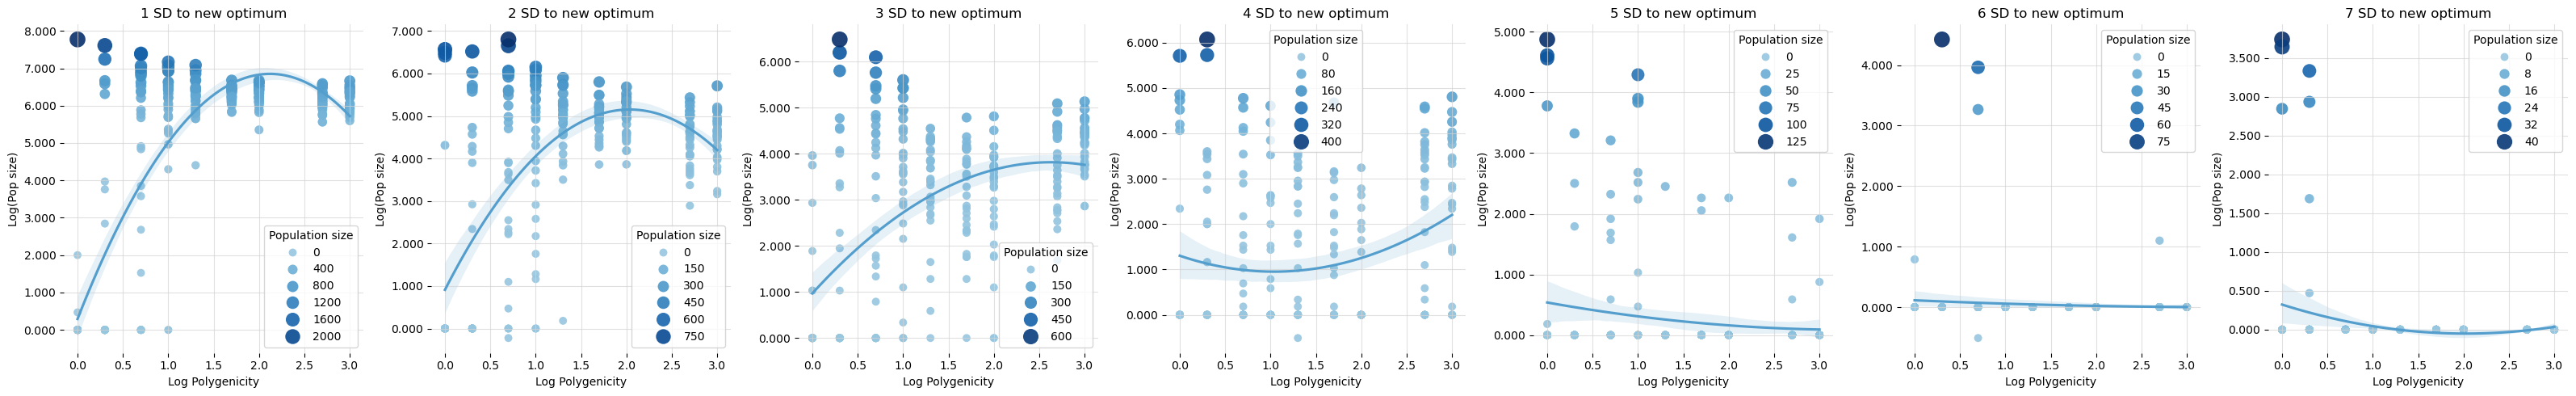

In [31]:
# Define the figure and subplots
fig, axes = plt.subplots(1, 7, figsize=(32, 5))

# List of optimas to iterate over
optimas = ['optima1','optima2', 'optima3', 'optima4', 'optima5', 'optima6', 'optima7']
for i, optima in enumerate(optimas):
    optima2 = h2_7[h2_7['optima'] == optima]

    # Scatter plot
    sns.scatterplot(data=optima2, x='log_poly', y='survival_log', hue='survival', palette=custom_cmap, size='survival', ax=axes[i],
                    sizes=(50, 200), linewidth=0,alpha =0.9)

    # Regression plot
    sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[3], ax=axes[i])

    # Set axes labels
    optima_str = optima.replace('optima', '')
    axes[i].set_title(f'{optima_str} SD to new optimum')
    axes[i].set_xlabel('Log Polygenicity')
    axes[i].set_ylabel('Log(Pop size)')

    # Customize the spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Customizing the plot aesthetics
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].grid(True, color='lightgrey', alpha=0.7)
    # Add legend with title
    axes[i].legend(title='Population size', loc='best')
    axes[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
    

    
plt.tight_layout()   
plt.savefig('figures/pop_size_vs_logpoly.png', transparent=True, dpi=300)
plt.savefig('figures/pop_size_vs_logpoly.pdf', transparent=True)

plt.show()

In [37]:
h2_7[['survival', 'survival_log']].drop_duplicates().sort_values('survival')

,survival,survival_log
1620,0.0,0.000000
6072,0.6,-0.510826
3863,0.8,-0.223144
4928,1.0,0.000000
3926,1.2,0.182322
...,...,...
548,4698.4,8.454977
583,4741.0,8.464003
542,4910.8,8.499192
562,4940.4,8.505202


In [31]:
optima2.sort_values('survival')

,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
9180,optima7,estrongsel,0.7,1,1,0.0,2.242140e-10,0.00000,0.000000
9351,optima7,estrongsel,0.7,50,29,0.0,8.421740e-82,1.69897,0.000000
9352,optima7,estrongsel,0.7,50,3,0.0,1.151683e-205,1.69897,0.000000
9353,optima7,estrongsel,0.7,50,30,0.0,0.000000e+00,1.69897,0.000000
9354,optima7,estrongsel,0.7,50,4,0.0,8.298440e-274,1.69897,0.000000
...,...,...,...,...,...,...,...,...,...
9209,optima7,estrongsel,0.7,1,9,17.2,1.833994e-03,0.00000,2.844909
9239,optima7,estrongsel,0.7,2,9,18.8,2.003245e-03,0.30103,2.933857
9217,optima7,estrongsel,0.7,2,16,28.0,6.503683e-04,0.30103,3.332205
9206,optima7,estrongsel,0.7,1,6,38.2,1.740976e-03,0.00000,3.642836


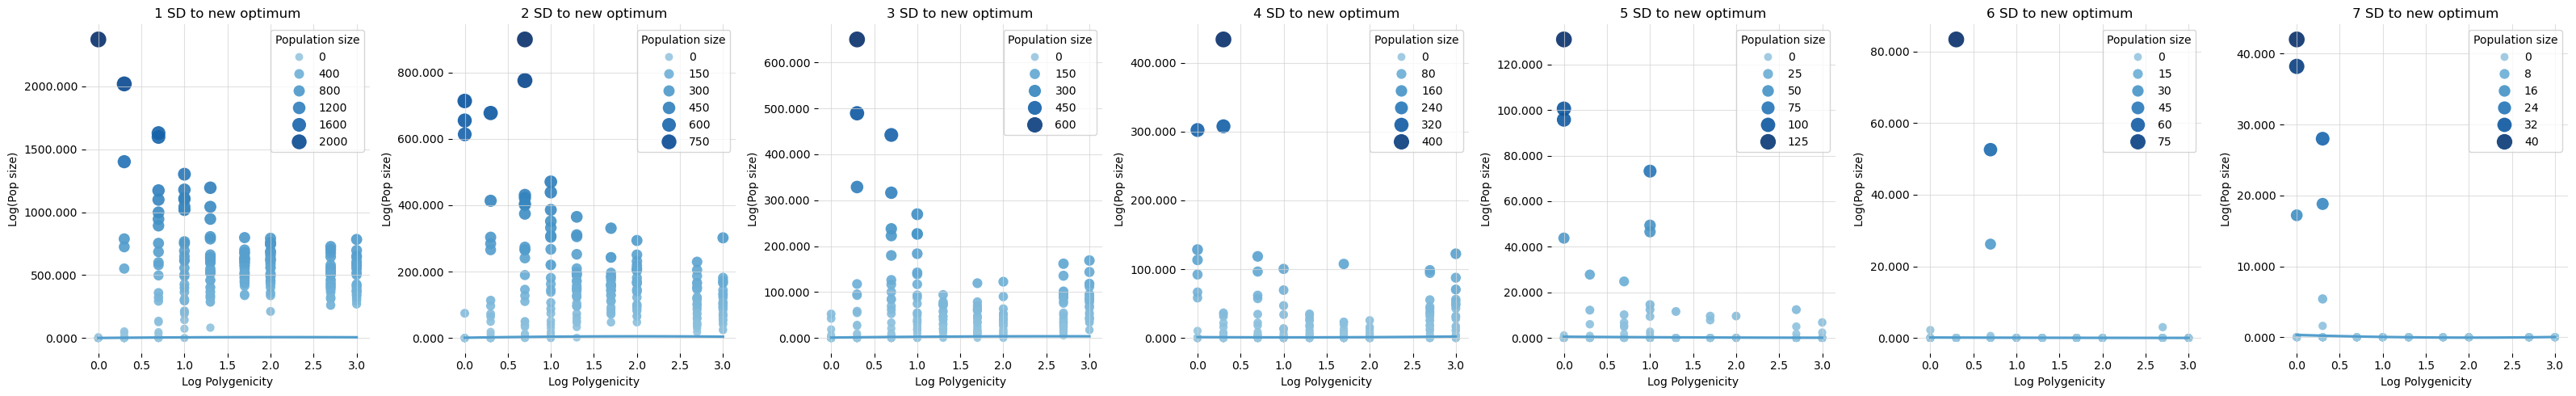

In [29]:
# Define the figure and subplots
fig, axes = plt.subplots(1, 7, figsize=(32, 5))

# List of optimas to iterate over
optimas = ['optima1','optima2', 'optima3', 'optima4', 'optima5', 'optima6', 'optima7']
for i, optima in enumerate(optimas):
    optima2 = h2_7[h2_7['optima'] == optima]

    # Scatter plot
    sns.scatterplot(data=optima2, x='log_poly', y='survival', hue='survival', palette=custom_cmap, size='survival', ax=axes[i],
                    sizes=(50, 200), linewidth=0,alpha =0.9)

    # Regression plot
    sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[3], ax=axes[i])

    # Set axes labels
    optima_str = optima.replace('optima', '')
    axes[i].set_title(f'{optima_str} SD to new optimum')
    axes[i].set_xlabel('Log Polygenicity')
    axes[i].set_ylabel('Log(Pop size)')

    # Customize the spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Customizing the plot aesthetics
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].grid(True, color='lightgrey', alpha=0.7)
    # Add legend with title
    axes[i].legend(title='Population size', loc='best')
    axes[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
    

    
plt.tight_layout()   
#plt.savefig('figures/pop_size_vs_logpoly.png', transparent=True, dpi=300)
#plt.savefig('figures/pop_size_vs_logpoly.pdf', transparent=True)

plt.show()

In [ ]:
# Define the figure and subplots
fig, axes = plt.subplots(1, 7, figsize=(32, 5))

# List of optimas to iterate over
optimas = ['optima1','optima2', 'optima3', 'optima4', 'optima5', 'optima6', 'optima7']
for i, optima in enumerate(optimas):
    optima2 = h2_7[h2_7['optima'] == optima]

    # Scatter plot
    sns.scatterplot(data=optima2, x='poly', y='survival_log', hue='survival', palette=custom_cmap, size='survival', ax=axes[i],
                    sizes=(50, 200), linewidth=0,alpha =0.9)

    # Regression plot
    sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[3], ax=axes[i])

    # Set axes labels
    optima_str = optima.replace('optima', '')
    axes[i].set_title(f'{optima_str} SD to new optimum')
    axes[i].set_xlabel('Log Polygenicity')
    axes[i].set_ylabel('Log(Pop size)')

    # Customize the spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Customizing the plot aesthetics
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].grid(True, color='lightgrey', alpha=0.7)
    # Add legend with title
    axes[i].legend(title='Population size', loc='best')
    axes[i].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
    

    
plt.tight_layout()   
#plt.savefig('figures/pop_size_vs_logpoly.png', transparent=True, dpi=300)
#plt.savefig('figures/pop_size_vs_logpoly.pdf', transparent=True)

plt.show()

In [21]:
pop_size_max

,poly,optima_int,h2,pop_size,log_poly
0,1,0.0,0.1,0.0,0.000000
1,1,0.0,0.5,240.0,0.000000
2,1,0.0,0.7,5847.0,0.000000
3,1,0.0,0.9,14303.0,0.000000
4,1,1.0,0.1,0.0,0.000000
...,...,...,...,...,...
319,1000,6.0,0.9,0.0,6.907755
320,1000,7.0,0.1,0.0,6.907755
321,1000,7.0,0.5,0.0,6.907755
322,1000,7.0,0.7,0.0,6.907755


In [22]:
# Define the independent variables and add a constant to the model (intercept)
X = pop_size_max[['log_poly', 'optima_int']]
X = sm.add_constant(X)  # adding a constant

# Define the dependent variable
y = pop_size_max['pop_size']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model to get the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pop_size   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     10.30
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           4.62e-05
Time:                        16:58:03   Log-Likelihood:                -3220.5
No. Observations:                 324   AIC:                             6447.
Df Residuals:                     321   BIC:                             6458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4872.5225    640.230      7.611      0.0

In [231]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming your DataFrame is named `pop_size_max`
# Load your data here, e.g., pop_size_max = pd.read_csv('your_data.csv')

# Define the model
# 'pop_size' is the dependent variable
# 'log_poly' and 'optima_int' are fixed effects
# 'h2' is treated as a random effect grouped, for example, by another variable 'group_id'
# If you don't have a grouping variable like 'group_id', you need to consider how to structure your random effects.
model = smf.mixedlm("pop_size ~ log_poly + optima_int", data=pop_size_max, groups=pop_size_max['h2'], re_formula="~h2")
result = model.fit()

# Print the results
print(result.summary())

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     pop_size    
No. Observations:     324         Method:                 REML        
No. Groups:           4           Scale:                  6809504.4099
Min. group size:      81          Log-Likelihood:         -2998.7477  
Max. group size:      81          Converged:              No          
Mean group size:      81.0                                            
----------------------------------------------------------------------
                  Coef.      Std.Err.   z    P>|z|   [0.025    0.975] 
----------------------------------------------------------------------
Intercept          2239.580  5199.719  0.431 0.667 -7951.682 12430.843
log_poly            -80.765    64.693 -1.248 0.212  -207.560    46.030
optima_int         -559.298    64.437 -8.680 0.000  -685.593  -433.004
Group Var         17482.528 12220.022                                 
Group x h2 Cov  -393227

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.273203
  warnings.warn(msg, ConvergenceWarning)


<Axes: xlabel='optima', ylabel='survival'>

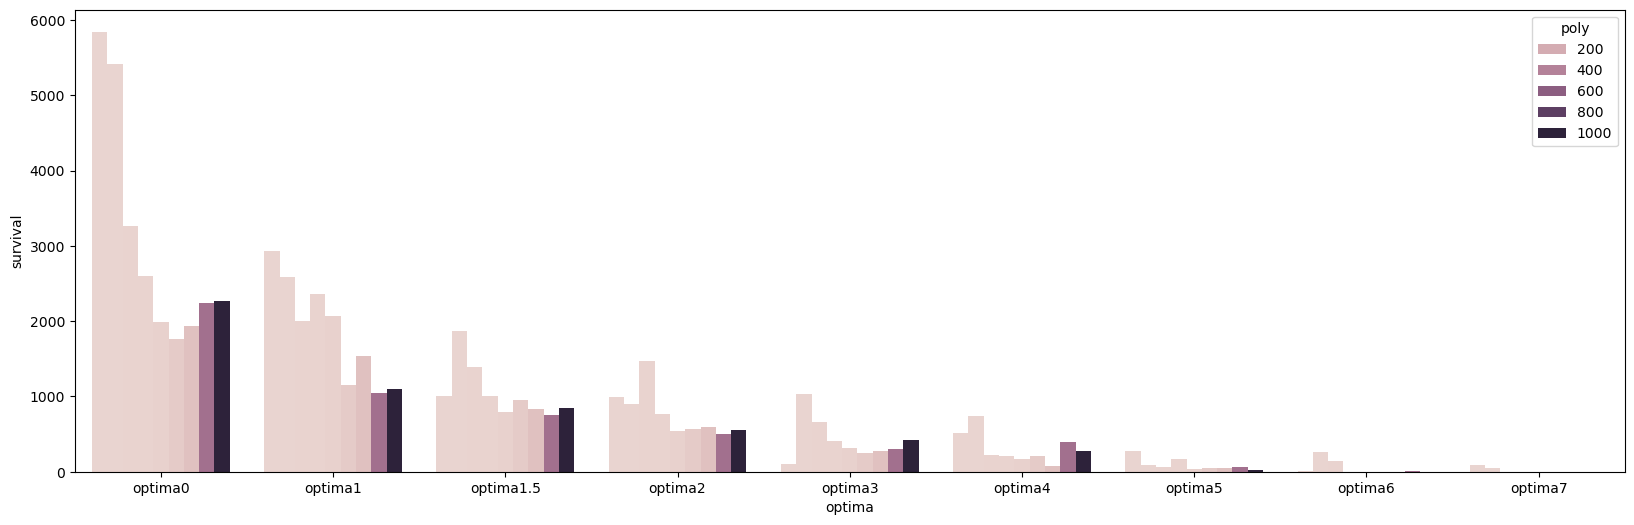

In [53]:
fig, axes = plt.subplots(figsize=(20, 6))
sns.barplot(pop_size_max, x = 'optima', y = 'survival', hue = 'poly')

In [74]:
pop_size_max['survival'].describe()

count      81.000000
mean      844.395062
std      1117.494034
min         0.000000
25%        68.000000
50%       424.000000
75%      1042.000000
max      5847.000000
Name: survival, dtype: float64

In [77]:
pop_size_max

,poly,optima,survival
0,1,optima0,5847.0
1,1,optima1,2927.0
2,1,optima1.5,1011.0
3,1,optima2,987.0
4,1,optima3,109.0
...,...,...,...
76,1000,optima3,424.0
77,1000,optima4,273.0
78,1000,optima5,29.0
79,1000,optima6,0.0


In [78]:
pop_size_max['log_poly'] = np.log10(pop_size_max['poly'])

P-value for log_poly: 0.0295


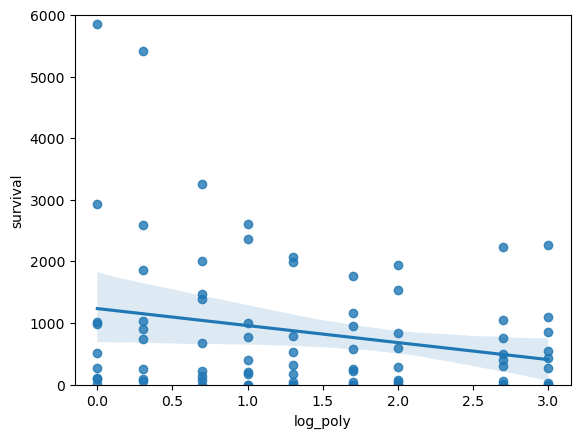

In [82]:
sns.regplot(data=pop_size_max, x='log_poly', y='survival')
X = pop_size_max['log_poly']
y = pop_size_max['survival']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X).fit()

# Store the summary of the model results
results = model.summary()

# Print the p-values for the slope (log_poly)
print(f"P-value for log_poly: {model.pvalues['log_poly']:.4f}")
# Set y-axis range
plt.ylim(0,6000)

# Show the plot
plt.show()

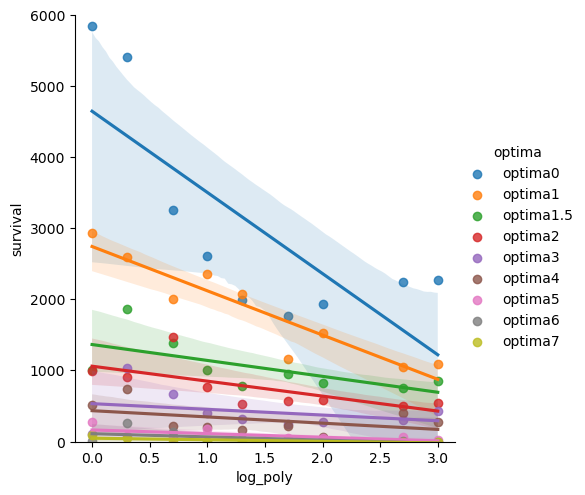

Linear regression results for optima=optima0:
P-value for log_poly: 0.0161
--------------------------------------------------
Linear regression results for optima=optima1:
P-value for log_poly: 0.0003
--------------------------------------------------
Linear regression results for optima=optima1.5:
P-value for log_poly: 0.0636
--------------------------------------------------
Linear regression results for optima=optima2:
P-value for log_poly: 0.0412
--------------------------------------------------
Linear regression results for optima=optima3:
P-value for log_poly: 0.4354
--------------------------------------------------
Linear regression results for optima=optima4:
P-value for log_poly: 0.2355
--------------------------------------------------
Linear regression results for optima=optima5:
P-value for log_poly: 0.0564
--------------------------------------------------
Linear regression results for optima=optima6:
P-value for log_poly: 0.1633
-----------------------------------------

/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... conti

In [80]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pop_size_max' is your DataFrame
# Set up the plot
sns.lmplot(data=pop_size_max, x='log_poly', y='survival', hue='optima')
plt.ylim(0, 6000)
plt.show()

# Now run linear regression for each 'optima' group
results = {}
for optima_value, group in pop_size_max.groupby('optima'):
    X = group['log_poly']
    y = group['survival']
    
    # Add a constant (intercept) to the model
    X = sm.add_constant(X)
    
    # Fit the OLS (Ordinary Least Squares) model
    model = sm.OLS(y, X).fit()
    
    # Store the summary of the model results
    results[optima_value] = model.summary()

    # Print the p-values for the slope (log_poly)
    print(f"Linear regression results for optima={optima_value}:")
    print(f"P-value for log_poly: {model.pvalues['log_poly']:.4f}")
    print("-" * 50)


In [54]:
pop_size

,optima,sel,h2,poly,rep,survival
90,optima2,estrongsel,0.7,2,11,0.0
91,optima2,estrongsel,0.7,2,11,0.0
92,optima2,estrongsel,0.7,2,11,0.0
93,optima2,estrongsel,0.7,2,11,0.0
94,optima2,estrongsel,0.7,2,11,0.0
...,...,...,...,...,...,...
48550,optima0,estrongsel,0.7,500,23,1262.0
48551,optima0,estrongsel,0.7,500,23,861.0
48552,optima0,estrongsel,0.7,500,23,1529.0
48553,optima0,estrongsel,0.7,500,23,951.0


In [64]:
low_poly = pop_size_max[pop_size_max['poly'].isin([ 1,  2,    5,   10])]
high_poly = pop_size_max[pop_size_max['poly'].isin([ 50,  100,   500, 1000])]

In [65]:
low_poly2 = low_poly[low_poly['optima'] =='optima2']
high_poly2 = high_poly[high_poly['optima'] =='optima2']

<Axes: xlabel='survival', ylabel='Count'>

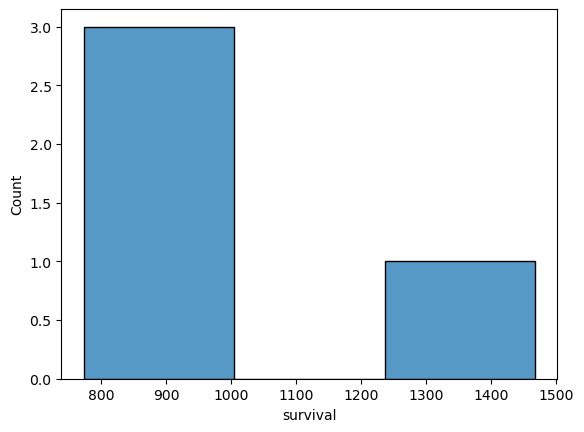

In [66]:
sns.histplot(low_poly2['survival'])

<Axes: xlabel='survival', ylabel='Count'>

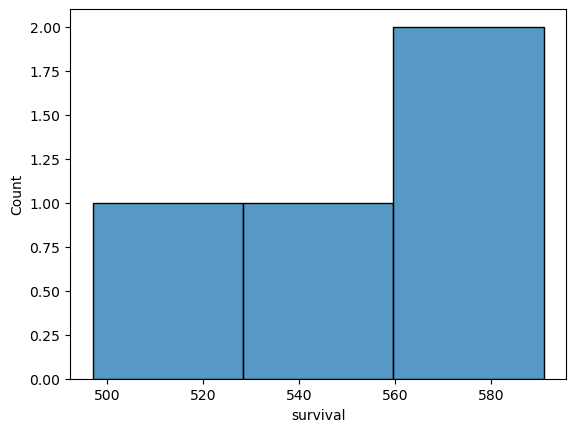

In [67]:
sns.histplot(high_poly2['survival'])

In [ ]:
survivalship = pop_size.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].sum() / pop_size.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].size() 

vfitnes = vfitnes.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['vfitnes_gen0'].mean()

survivalship_vfitnes = survivalship.reset_index().merge(vfitnes.reset_index(),on =  ['optima', 'sel', 'h2', 'poly', 'rep'])

survivalship_vfitnes['poly'] = survivalship_vfitnes['poly'].str.replace('pi', '').astype(int)
survivalship_vfitnes['h2'] = survivalship_vfitnes['h2'].replace(heritability_data)



survivalship_vfitnes['log_poly'] = np.log10(survivalship_vfitnes['poly'])

survivalship_vfitnes['optima'].unique()

optima1 = survivalship_vfitnes[survivalship_vfitnes['optima']=='optima1']
optima1_h2 = optima1[optima1['h2']==0.7]





survivalship_vfitnes['survival_log'] = np.log(survivalship_vfitnes['survival'] )



survivalship_vfitnes['survival_log'] = survivalship_vfitnes['survival_log'].replace(np.NINF, 0)


survivalship_vfitnes['log_poly'] = np.log10(survivalship_vfitnes['poly'])

In [28]:
survivalship_vfitnes

,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
0,optima0,estrongsel,0.1,1,1,0.0,2.238672e-02,0.00000,0.0
1,optima0,estrongsel,0.1,1,10,0.0,2.265906e-02,0.00000,0.0
2,optima0,estrongsel,0.1,1,11,0.0,2.394252e-02,0.00000,0.0
3,optima0,estrongsel,0.1,1,12,0.0,2.235404e-02,0.00000,0.0
4,optima0,estrongsel,0.1,1,13,0.0,2.374728e-02,0.00000,0.0
...,...,...,...,...,...,...,...,...,...
9715,optima7,estrongsel,0.9,500,5,0.0,2.897676e-300,2.69897,0.0
9716,optima7,estrongsel,0.9,500,6,0.0,1.647814e-263,2.69897,0.0
9717,optima7,estrongsel,0.9,500,7,0.0,3.656920e-145,2.69897,0.0
9718,optima7,estrongsel,0.9,500,8,0.0,7.538580e-306,2.69897,0.0


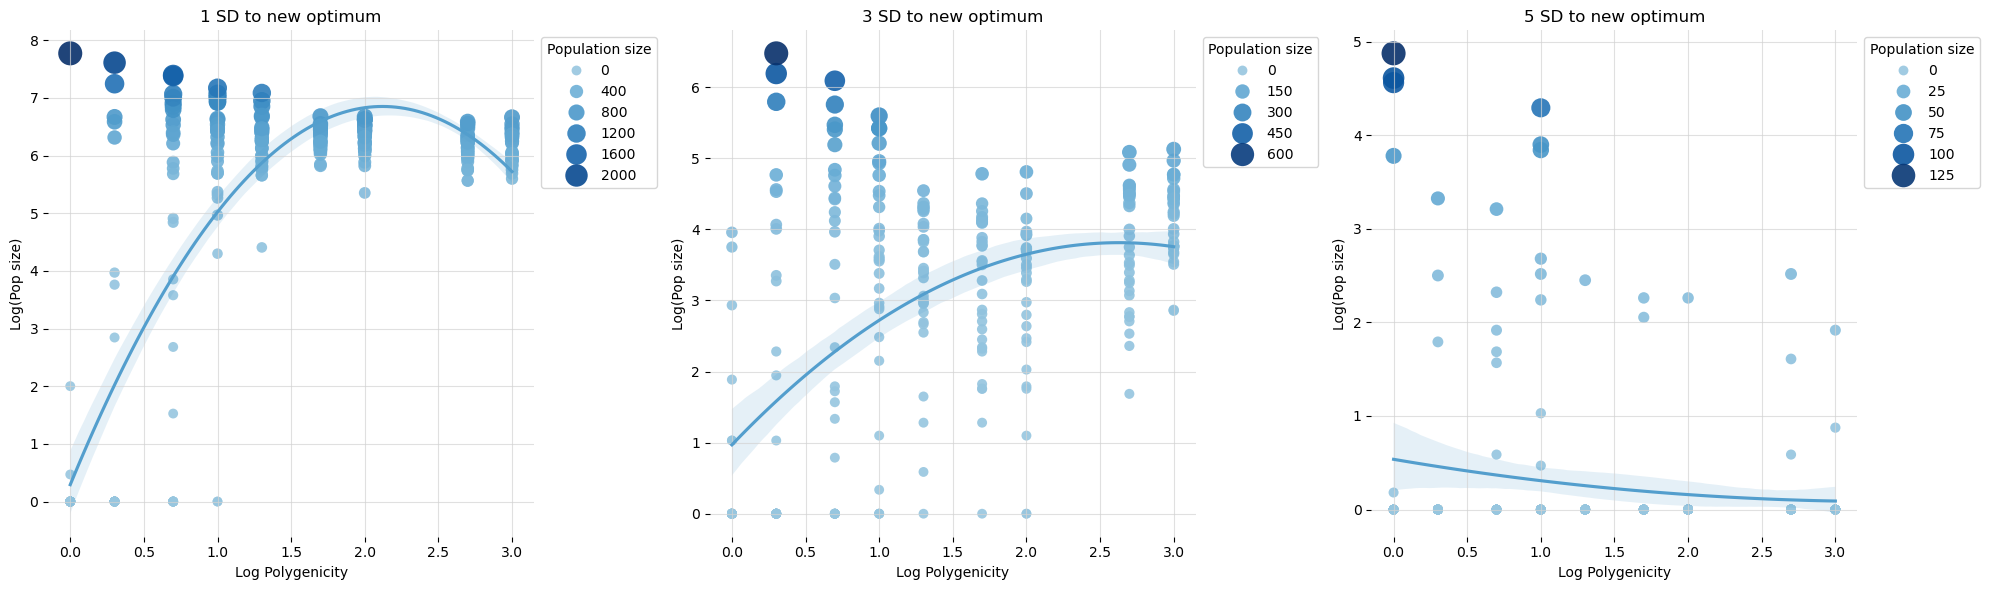

In [27]:
# Define the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# List of optimas to iterate over
optimas = ['optima1', 'optima3', 'optima5']
for i, optima in enumerate(optimas):
    optima2 = h2_7[h2_7['optima'] == optima]

    # Scatter plot
    sns.scatterplot(data=optima2, x='log_poly', y='survival_log', hue='survival', palette=custom_cmap, size='survival', ax=axes[i],
                    sizes=(50, 300), linewidth=0,alpha =0.9)

    # Regression plot
    sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[3], ax=axes[i])

    # Set axes labels
    optima_str = optima.replace('optima', '')
    axes[i].set_title(f'{optima_str} SD to new optimum')
    axes[i].set_xlabel('Log Polygenicity')
    axes[i].set_ylabel('Log(Pop size)')

    # Customize the spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Customizing the plot aesthetics
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].grid(True, color='lightgrey', alpha=0.7)
    # Add legend with title
    axes[i].legend(title='Population size', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()   
plt.savefig('figures/pop_size_vs_logpoly.png', transparent=True, dpi=300)
plt.savefig('figures/pop_size_vs_logpoly.svg', transparent=True)

plt.show()

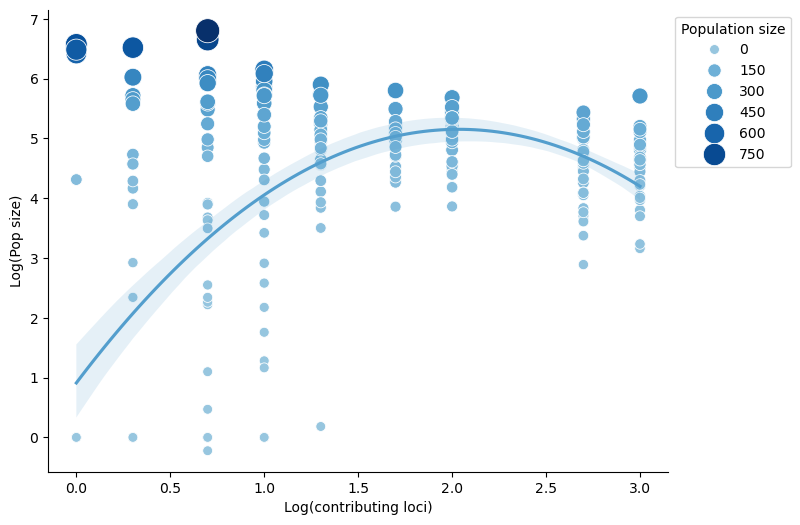

In [31]:





plt.show()

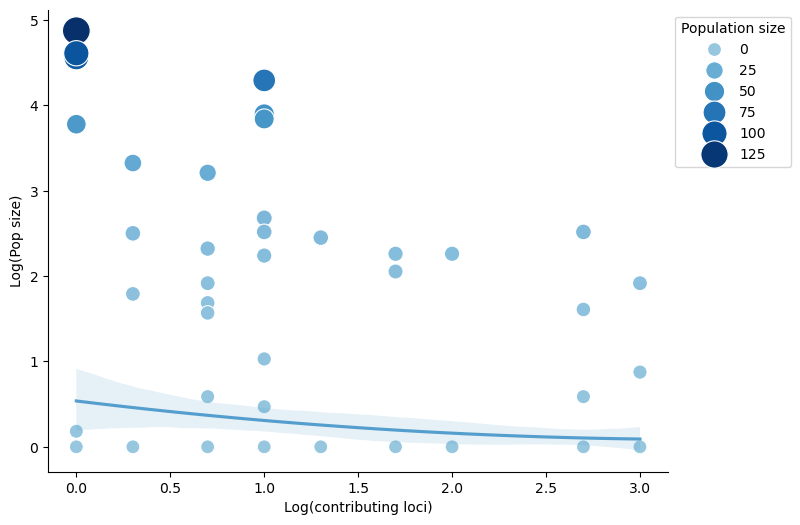

In [33]:
h2_7 = survivalship_vfitnes[survivalship_vfitnes['h2']==0.7]

optima2 = h2_7[h2_7['optima'].isin(['optima5'])]

# Predictor and Response remain the same
X = optima2['log_poly']  # Predictor
y = optima2['survival_log']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['log_poly']
p_value = linear_res.pvalues['log_poly']
t_value = slope / linear_res.bse['log_poly']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=optima2, x='log_poly', y='survival_log', hue = 'survival', palette=custom_cmap, size = 'survival',
               sizes=(100, 400))

sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[3])
#plt.text(0.1, 0.9, f'Slope: {slope:.5f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('Log(contributing loci)')
plt.ylabel('Log(Pop size)')
sns.despine()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend = ax.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Population size')  # Adjust bbox_to_anchor as needed
plt.savefig("figures/log_polyvs_pop_size_optima5.pdf", format='pdf', bbox_inches='tight', transparent=True,
           dpi=300)
plt.savefig("figures/log_polyvs_pop_size_optima5.png", format='png', bbox_inches='tight', transparent=True,
           dpi=300)


plt.show()

In [45]:
h2_7 = survivalship_vfitnes[survivalship_vfitnes['h2']==0.7]
optima2 = h2_7[h2_7['optima'].isin(['optima5'])]

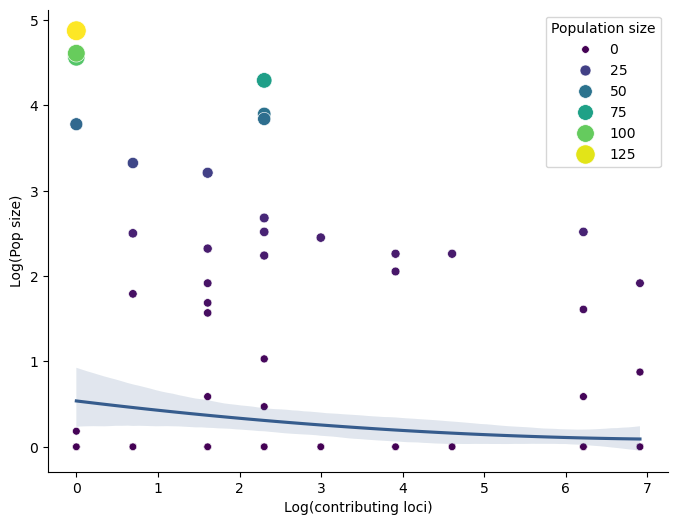

In [46]:
# Predictor and Response remain the same
X = optima2['log_poly']  # Predictor
y = optima2['survival_log']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['log_poly']
p_value = linear_res.pvalues['log_poly']
t_value = slope / linear_res.bse['log_poly']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=optima2, x='log_poly', y='survival_log', hue = 'survival', palette='viridis', size = 'survival',
               sizes=(30, 200))

sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[1])
#plt.text(0.1, 0.9, f'Slope: {slope:.5f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('Log(contributing loci)')
plt.ylabel('Log(Pop size)')
sns.despine()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend = ax.legend()
legend.set_title('Population size')
plt.savefig("log_polyvs_pop_size_optima4.pdf", format='pdf', bbox_inches='tight')
plt.savefig("log_polyvs_pop_size_optima4.png", format='png', bbox_inches='tight')


plt.show()

In [76]:
#survivalship_vfitnes = survivalship_vfitnes[survivalship_vfitnes['optima'] == 'optima1']

In [48]:
palette = sns.color_palette("viridis", 9)

In [52]:
h2_7

,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
540,optima0,estrongsel,0.7,1,1,3768.2,8.099962e-02,0.000000,8.234353
541,optima0,estrongsel,0.7,1,10,3926.6,8.034816e-02,0.000000,8.275529
542,optima0,estrongsel,0.7,1,11,4910.8,8.428364e-02,0.000000,8.499192
543,optima0,estrongsel,0.7,1,12,4584.2,8.242780e-02,0.000000,8.430371
544,optima0,estrongsel,0.7,1,13,4185.8,8.342186e-02,0.000000,8.339453
...,...,...,...,...,...,...,...,...,...
9445,optima7,estrongsel,0.7,500,5,0.0,5.214160e-144,6.214608,0.000000
9446,optima7,estrongsel,0.7,500,6,0.0,1.706894e-106,6.214608,0.000000
9447,optima7,estrongsel,0.7,500,7,0.0,6.885900e-57,6.214608,0.000000
9448,optima7,estrongsel,0.7,500,8,0.0,1.144428e-169,6.214608,0.000000


In [51]:
survivalship_vfitnes['survival_log'] = np.log(survivalship_vfitnes['survival'] )

,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
3780,optima2,estrongsel,0.7,1,1,0.0,0.000540,0.000000,0.000000
3781,optima2,estrongsel,0.7,1,10,0.0,0.000299,0.000000,0.000000
3782,optima2,estrongsel,0.7,1,11,0.0,0.000619,0.000000,0.000000
3783,optima2,estrongsel,0.7,1,12,0.0,0.000644,0.000000,0.000000
3784,optima2,estrongsel,0.7,1,13,0.0,0.000823,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
4045,optima2,estrongsel,0.7,500,5,40.8,0.011772,6.214608,3.708682
4046,optima2,estrongsel,0.7,500,6,37.0,0.009724,6.214608,3.610918
4047,optima2,estrongsel,0.7,500,7,166.2,0.009414,6.214608,5.113192
4048,optima2,estrongsel,0.7,500,8,186.8,0.011335,6.214608,5.230039


,optima,sel,h2,poly,rep,survival,vfitnes_gen0,log_poly,survival_log
3780,optima2,estrongsel,0.7,1,1,0.0,0.000540,0.000000,0.000000
3781,optima2,estrongsel,0.7,1,10,0.0,0.000299,0.000000,0.000000
3782,optima2,estrongsel,0.7,1,11,0.0,0.000619,0.000000,0.000000
3783,optima2,estrongsel,0.7,1,12,0.0,0.000644,0.000000,0.000000
3784,optima2,estrongsel,0.7,1,13,0.0,0.000823,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
4045,optima2,estrongsel,0.7,500,5,40.8,0.011772,6.214608,3.708682
4046,optima2,estrongsel,0.7,500,6,37.0,0.009724,6.214608,3.610918
4047,optima2,estrongsel,0.7,500,7,166.2,0.009414,6.214608,5.113192
4048,optima2,estrongsel,0.7,500,8,186.8,0.011335,6.214608,5.230039


/tmp/ipykernel_841134/1573825091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optima2['poly_str'] = optima2['poly'].astype(str)
/tmp/ipykernel_841134/1573825091.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optima2.loc[:,'survival_jittered'] = optima2.loc[:,'survival_log'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima2))


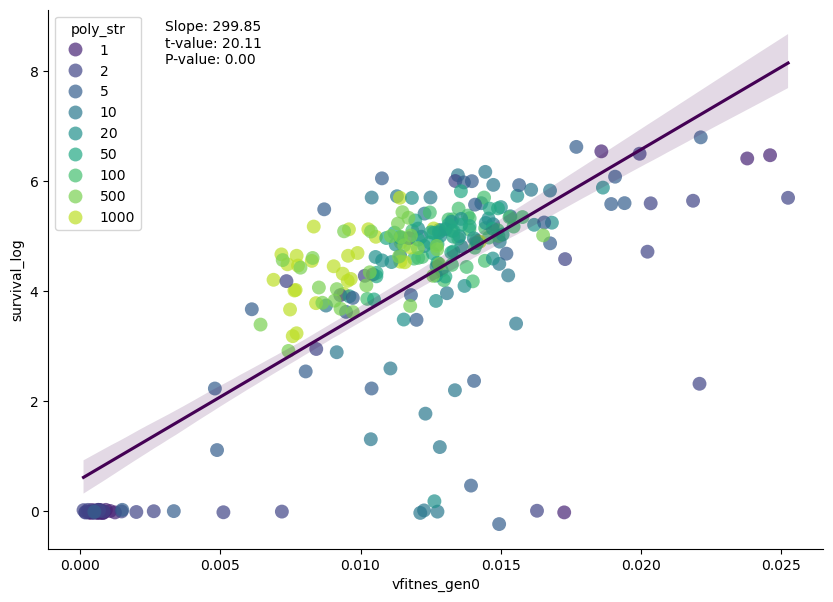

In [58]:
optima2 = h2_7[h2_7['optima'].isin(['optima2'])]
optima2['poly_str'] = optima2['poly'].astype(str)
# Predictor and Response remain the same
X = optima2['vfitnes_gen0']  # Predictor
y = optima2['survival_log']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['vfitnes_gen0']
p_value = linear_res.pvalues['vfitnes_gen0']
t_value = slope / linear_res.bse['vfitnes_gen0']

# Plotting
plt.figure(figsize=(10, 7))
# Adding jitter to the 'y' values
jitter_amount = 0.03  # Adjust this value as needed based on your data's scale
optima2.loc[:,'survival_jittered'] = optima2.loc[:,'survival_log'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima2))

# Plotting
sns.scatterplot(data=optima2, x='vfitnes_gen0', y='survival_jittered', hue='poly_str', alpha=0.7, s=100,linewidth=0, palette=palette,
               hue_order=poly_str_order)

sns.regplot(data=optima2, x='vfitnes_gen0', y='survival_log', scatter=False, color="#440154")
plt.text(0.15, 0.9, f'Slope: {slope:.2f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('vfitnes_gen0')
plt.ylabel('survival_log')
sns.despine()

plt.show()

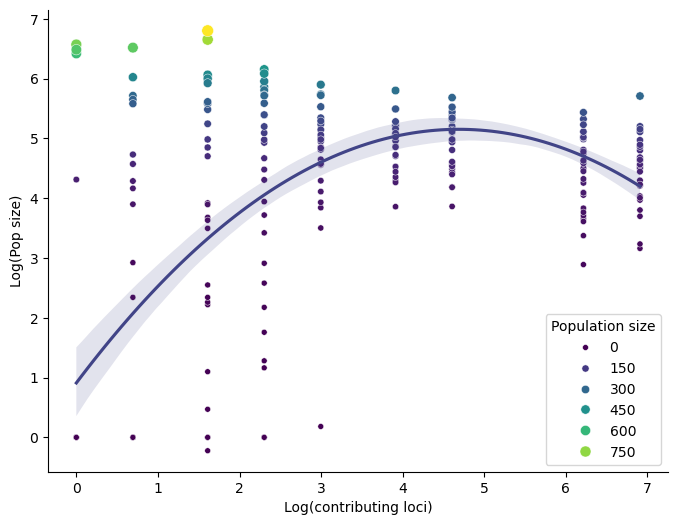

In [60]:
# Predictor and Response remain the same
X = optima2['log_poly']  # Predictor
y = optima2['survival_log']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['log_poly']
p_value = linear_res.pvalues['log_poly']
t_value = slope / linear_res.bse['log_poly']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=optima2, x='log_poly', y='survival_log', hue = 'survival', palette='viridis', size = 'survival')

sns.regplot(data=optima2, x='log_poly', y='survival_log', scatter=False, order=2, color =palette[1])
#plt.text(0.1, 0.9, f'Slope: {slope:.5f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('Log(contributing loci)')
plt.ylabel('Log(Pop size)')
sns.despine()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend = ax.legend()
legend.set_title('Population size')
plt.savefig("log_polyvs_pop_size_optima2.pdf", format='pdf', bbox_inches='tight')
plt.savefig("log_polyvs_pop_size_optima2.png", format='png', bbox_inches='tight')


plt.show()